<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/PhanLoaiBaoNgu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/ML/data/abalone/abalone.data'
df = pd.read_csv(file_path, header=None)

In [ ]:
#mục tiêu : phân loại các giới tính của các loài bào ngư thông qua chiều dài, cân nặng, tuổi (rings + 1.5)

In [ ]:
df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "rings",
]

In [ ]:
df['ages'] = df.rings + 1.5

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings,ages
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [ ]:
num_rows, num_columns = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_columns}")

Số dòng: 4177
Số cột: 10


In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
rings               int64
ages              float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
X = df.iloc[:,1:10].values
y = df.iloc[:,0:1].values

##SKLearn


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

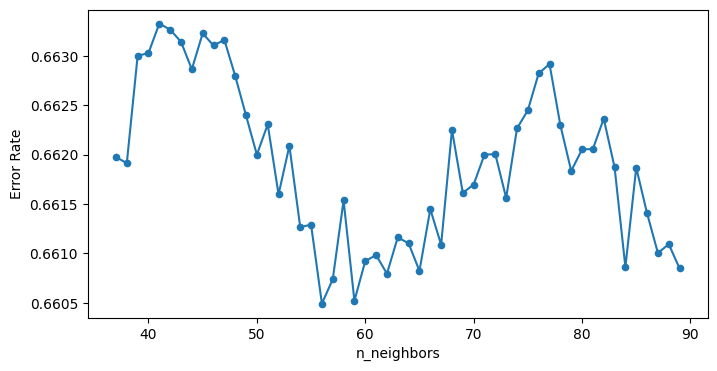

In [ ]:
error_rate = []

for i in range(37,90):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    #knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(37,90),error_rate, marker='.', markersize=9)
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=57)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=57)

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5645933014354066


              precision    recall  f1-score   support

           F       0.44      0.34      0.38       314
           I       0.74      0.77      0.76       350
           M       0.49      0.56      0.52       381

    accuracy                           0.56      1045
   macro avg       0.56      0.56      0.55      1045
weighted avg       0.56      0.56      0.56      1045



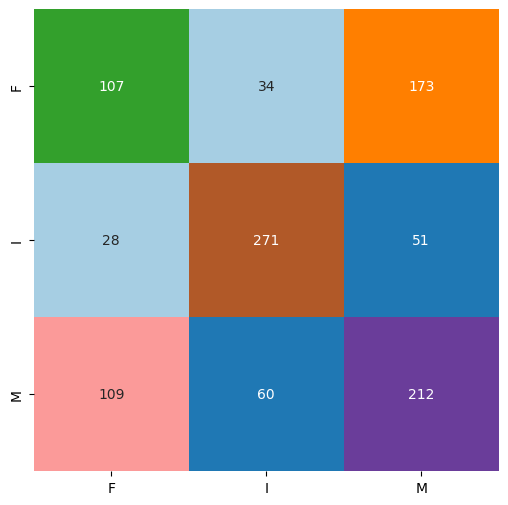

In [ ]:
# Báo cáo phân loại và ma trận nhầm lẫn
print(classification_report(y_test, y_pred))
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cmat, annot=True, cmap='Paired', cbar=False, fmt="d", xticklabels=['F', 'I','M'], yticklabels=['F', 'I','M'])
plt.show()

In [ ]:
'''
     F                I                M
F    TP               FP               FP
I    FN               TP               FP
M    FN               FN               TP

'''

##Mathematic (bị lỗi không chạy được)


In [ ]:
# @title
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=100)

In [ ]:
# @title
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [ ]:
# @title
def predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

In [ ]:
# @title
# Kết quả dự đoán với k = 59
k = 59
prediction = predict(X, y, X_test, k)
print("Predicted class:", prediction)